## <div align="center"> UJIAN AKHIR SEMESTER IF540-L MACHINE LEARNING </div>
## <div align="center"> Semester Gasal 2024/2025 </div>
## <div align="center"> Penerapan Algoritma Random Forest untuk Prediksi Penyakit Stroke </div>

---
## Instruction

<ul>
    <li>Please make sure that <b>ALL</b> required submission files are submitted on the E-Learning.</li>
    <li>Please make sure to use <b>Markdown</b> as comment for the code you are writing</li>
    <li>Do not ZIP the submission files</li>
</ul>

## Caution
<ul>
    <li>We DOES NOT ACCEPT a submission via Gmail, Google Drive, Whatsapp, or any other than E-Learning</li>
    <li>We DOES NOT tolerate any plagriarism, etc.</li>
    <li>DO NOT change the order of this template.</li>
</ul>

---
### Group - 2

##### Members : 
<ul>
    <li>1. Arya Setiawan (00000083123)</li>
    <li>2. Raisya Putri Virnanda (00000081024)</li>
    <li>3. Nadya Sava Maritza (00000082273)</li>
    <li>4. Karsteen Pambudi W (00000083253)</li>
    <li>5. Marcellino Reda (00000082284)</li>
</ul>

---



### The dataset that are being used for the project

1. Stroke Prediction Dataset – sumber : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

### Dataset Description: 
##### Please describe the dataset with much detail if possible
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not <br><br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient 
### Project Showcase

### **initialization**


#### Import Library
Pada bagian ini kami mengimpor berbagai pustaka yang diperlukan untuk analisis dan pemodelan klasifikasi stroke. Pustaka-pustaka ini termasuk pustaka untuk manipulasi data, visualisasi, serta untuk membangun dan melatih model Random Forest.

In [1]:
# Library untuk Manipulasi Data
import pandas as pd
import numpy as np

# Library untuk Visualisasi Grafik
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Pre-Processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Library untuk Modeling dan Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV

#### Data Preparation
Pada bagian ini kami meyiapkan dataset yang akan digunakan untuk melatih dan menguji model klasifikasi stroke. Langkah-langkah yang kami lakukan dalam tahapan ini diantaranya sebagai berikut:
1. Mengakses file .csv pada folder yang telah ditetapkan
2. Memeriksa dimensi yang dimiliki dataset. Data tersebut memiliki total entri sebanyak 5110 dan 11 fitur + 1 label
3. Melihat 5 data teratas pada dataset
4. Menghapus fitur **id** pada dataset karena kami tidak akan menggunakannya pada proses pengujian model

In [2]:
# Mengakses file dataset

data = pd.read_csv('Datasets/healthcare-dataset-stroke-data.csv')

In [3]:
# Memeriksa dimensi dataset

data.shape

(5110, 12)

In [4]:
# Melihat 5 data teratas pada dataset

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Menghapus fitur 'id'

data.drop('id', axis = 1, inplace = True)

### **Pre-Processing**

#### Data Exploration
Pada tahapan ini kami melakukan eksplorasi data untuk mendapatkan pemahaman terhadap karakteristik dari dataset yang kita gunakan. Beberapa diantaranya mengidentifikasi missing value, data duplikat, data yang tidak sesuai, dan distribusi data

In [6]:
# Menampilkan informasi kelas/fitur pada dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Analisis
Sesuai dengan output yang dikeluarkan. Fitur yang memiliki nilai null hanya fitur bmi. Maka dari itu setelah ini kami melakukan perhitungan jumlah nilai null untuk setiap fitur

In [7]:
# Melakukan pemeriksaan missing value pada dataset

null_counts = data.isnull().sum()
print(f'Jumlah missing value pada dataset: \n{null_counts}')

Jumlah missing value pada dataset: 
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
# Menampilkan persentase fitur BMI

null_counts = data['bmi'].isnull().sum()/data['bmi'].shape[0]*100
print(f'Persentase jumlah missing value pada data BMI: {null_counts:.3f}')

Persentase jumlah missing value pada data BMI: 3.933


#### Analisis
Berdasarkan dua baris kode di atas, jumlah missing value yang terdapat pada fitur bmi berjumlah 201 atau sekitar 3.9%.

In [9]:
# Mengidenfikasi data duplikat
# Pada dataset ini tidak ada data yang duplikat

data.duplicated().sum()

0

In [10]:
# Mengidentifikasi jumlah setiap class pada fitur 

for col in data.select_dtypes(include='object').columns:
    print(data[col].value_counts())
    print('***'*10)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
******************************
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
******************************
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
******************************
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
******************************
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
******************************


In [11]:
# Melihat karakteristik distribusi data pada dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#### Analisis
**Age (Usia)**

- Rata-rata (Mean): 43.2 tahun. Umumnya orang dalam dataset berusia pertengahan.
- Standar deviasi (Std): 22.6 tahun, menunjukkan variasi usia yang signifikan.
- Rentang (Min - Max): Usia terendah adalah 0.08 tahun (mungkin bayi), dan tertua adalah 82 tahun.
- Median (50%): Usia tengah adalah 45 tahun, yang sejalan dengan rata-rata.

**Hypertension (Hipertensi)**

- Rata-rata (Mean): 0.097, yang berarti sekitar 9.7% individu dalam dataset memiliki hipertensi.

**Heart Disease**

- Rata-rata (Mean): 0.054, menunjukkan sekitar 5.4% dari individu dalam dataset memiliki penyakit jantung.

**Avg Glucose Level**

- Rata-rata (Mean): 106.15 mg/dL. Ini mungkin menunjukkan tingkat gula darah normal hingga tinggi dalam dataset.
- Standar deviasi (Std): 45.28, menunjukkan variasi yang signifikan dalam tingkat glukosa di antara individu.
- Rentang (Min - Max): 55.12 hingga 271.74 mg/dL.

**BMI (Indeks Massa Tubuh)**

- Rata-rata (Mean): 28.89, yang mendekati batas kategori kelebihan berat badan (overweight).
- Standar deviasi (Std): 7.85, menunjukkan variasi BMI yang besar di dataset.
- Rentang (Min - Max): BMI terendah adalah 10.3 dan tertinggi adalah 97.6

**Stroke**

- Rata-rata (Mean): 0.048, menunjukkan bahwa 4.9% dari individu mengalami stroke.

In [12]:
# Menampikan karakteristik pada fitur kategorikal

data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


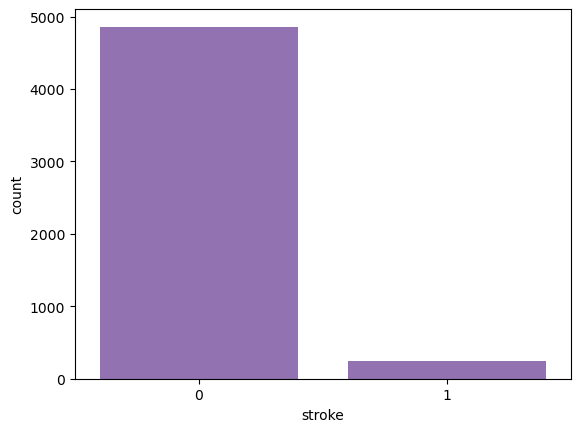

In [19]:
# Menampilkan nilai yang terdapat pada fitur stroke

sns.countplot(x='stroke', data = data)
plt.show()

In [20]:
# Menampilkan nilai rata-rata pada fitur berdasarkan stroke

data.select_dtypes(include='number').groupby('stroke').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.971545,0.088871,0.047110,104.795513,28.823064
1,67.728193,0.265060,0.188755,132.544739,30.471292


#### Analisis

Data ini sangat tidak seimbang. Sebagian besar orang dalam dataset tidak mengalami stroke, sedangkan hanya sebagian kecil yang mengalaminya. Dalam kasus data yang tidak seimbang seperti ini, model prediksi bisa condong untuk memprediksi sebagian besar data sebagai "tidak mengalami stroke" dan mengabaikan kelas minoritas (individu yang mengalami stroke). Oleh karena itu kami akan melakukan oversampling dengan fungsi SMOTE dari pustaka imblearn sebelum melakukan training model

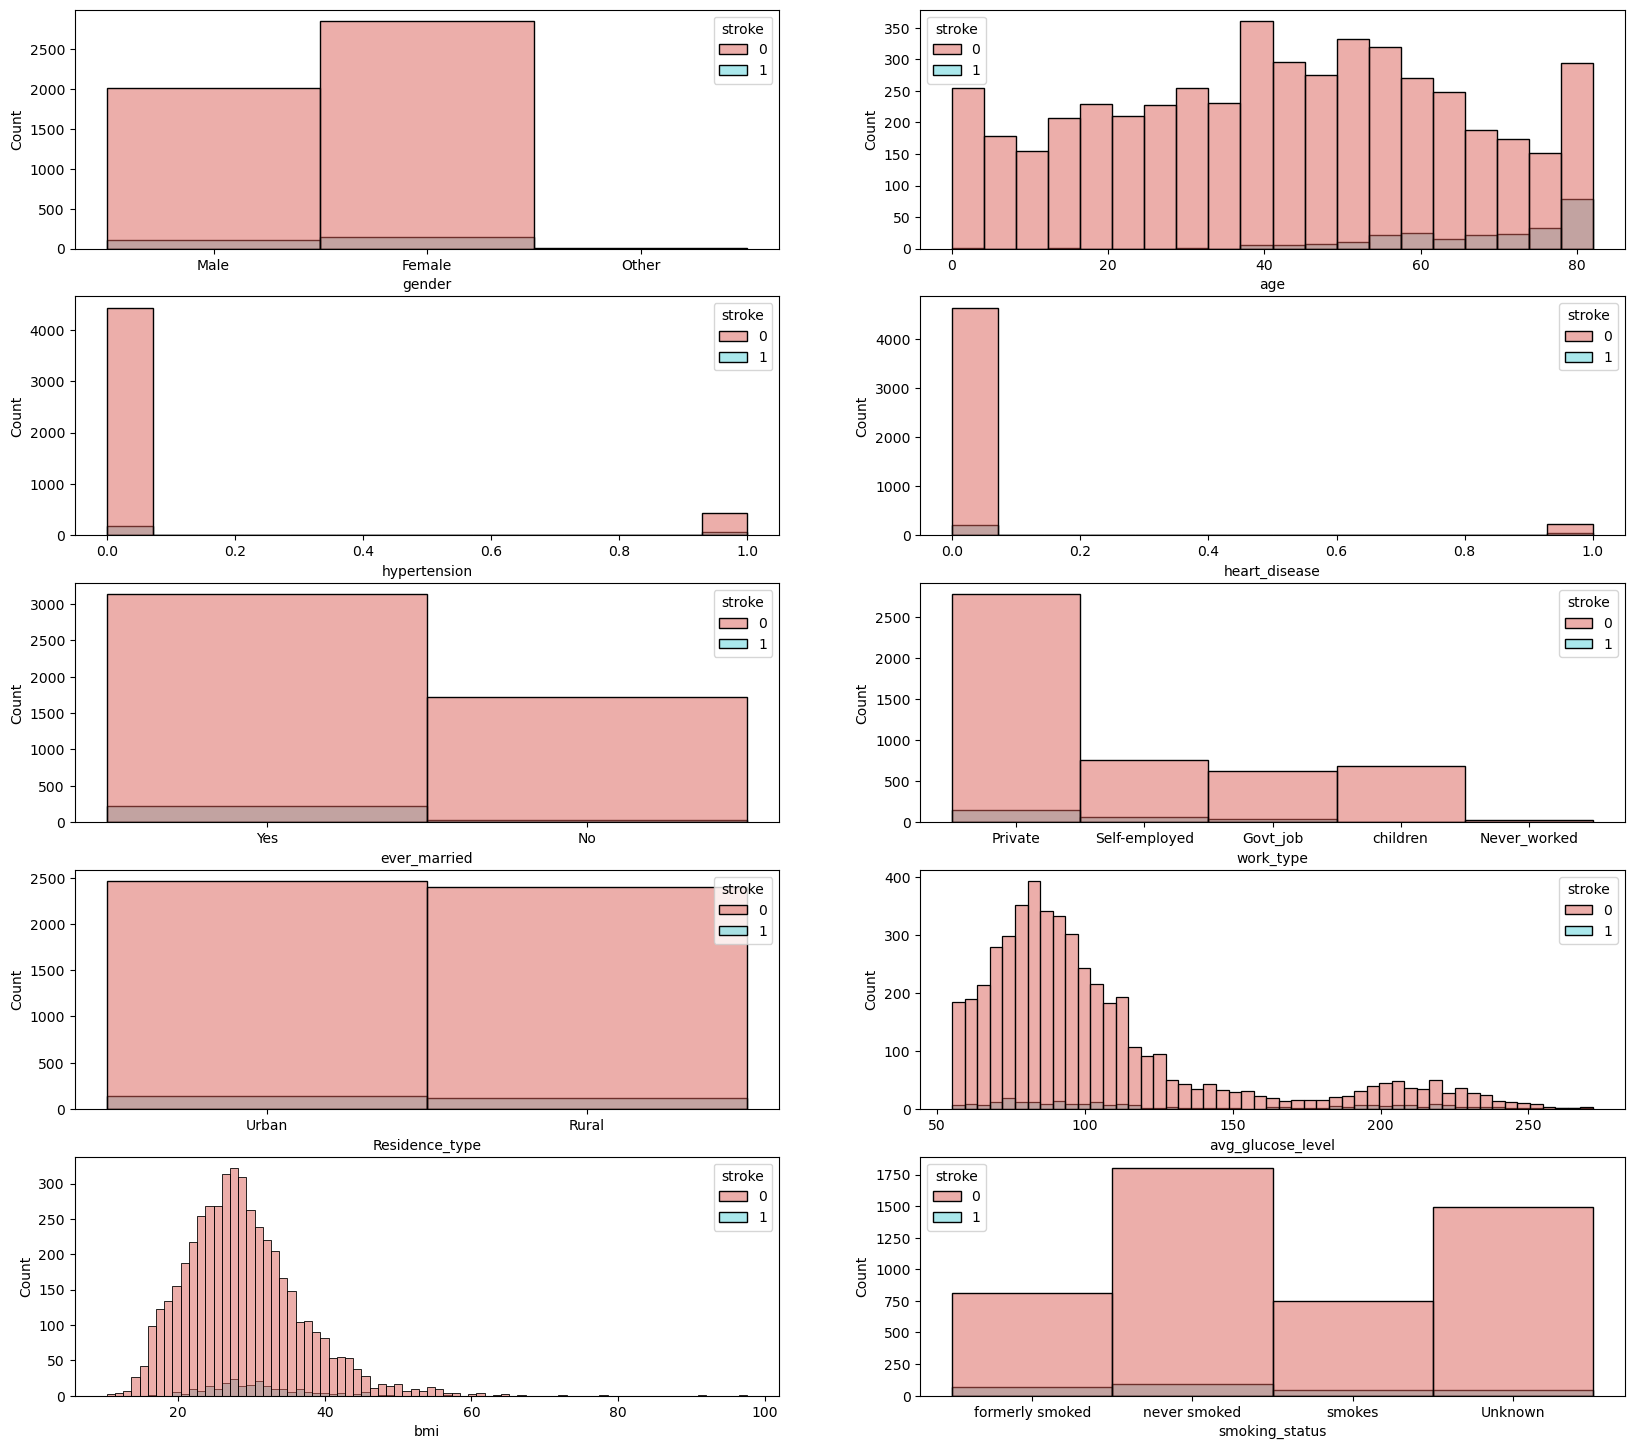

In [22]:
# Menampilkan jumlah instansi yang berlabel stroke atau tidak stroke pada setiap kolom fitur

plt.figure(figsize = (20, 18))
for i, col in enumerate(data.drop('stroke', axis = 1).columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(x = col, hue = 'stroke', data = data, palette='hls')
plt.show()

#### Analisis
1. **Gender (Jenis Kelamin)**:
   - Jumlah perempuan lebih tinggi daripada laki-laki yang mengalami stroke.
   - Hampir tidak ada data untuk kategori "Other".

2. **Age (Usia)**:
   - Distribusi usia cukup merata antara usia muda hingga dewasa tua.
   - Insiden stroke meningkat di kalangan orang tua, terutama pada usia 60 ke atas.

3. **Hypertension (Hipertensi)**:
   - Mayoritas orang yang tidak memiliki hipertensi tidak mengalami stroke, namun jumlah orang dengan hipertensi yang mengalami stroke juga cukup signifikan.

4. **Heart Disease (Penyakit Jantung)**:
   - Sebagian besar individu tanpa penyakit jantung tidak mengalami stroke.
   - Ada peningkatan insiden stroke pada individu dengan penyakit jantung, meskipun jumlahnya lebih kecil.

5. **Ever Married (Pernah Menikah)**:
   - Orang yang pernah menikah tampaknya lebih banyak mengalami stroke dibandingkan dengan yang belum menikah, tetapi ada distribusi yang cukup merata untuk keduanya.

6. **Work Type (Tipe Pekerjaan)**:
   - Pekerja di sektor privat adalah kelompok terbesar dalam dataset, dan mereka juga yang paling banyak mengalami stroke.
   - Anak-anak dan orang yang tidak pernah bekerja tampaknya jarang mengalami stroke, tetapi datanya terbatas.

7. **Residence Type (Tipe Tempat Tinggal)**:
   - Orang yang tinggal di area urban maupun rural menunjukkan distribusi insiden stroke yang hampir seimbang, meskipun sedikit lebih banyak dari area urban.

8. **BMI (Body Mass Index)**:
   - Distribusi BMI mayoritas berada di kisaran 20-40.
   - Tidak terlihat perbedaan yang mencolok terkait insiden stroke berdasarkan BMI, namun rentang BMI 30-40 tampaknya lebih rentan terhadap stroke.

9. **Average Glucose Level (Rata-rata Gula Darah)**:
   - Mayoritas individu dengan kadar gula darah normal (sekitar 50-100) cenderung tidak mengalami stroke.
   - Insiden stroke meningkat pada kadar gula yang lebih tinggi (di atas 150).

10. **Smoking Status (Status Merokok)**:
    - Orang yang tidak pernah merokok merupakan kelompok terbesar.
    - Insiden stroke tampak lebih tinggi pada orang yang pernah merokok dan yang status merokoknya tidak diketahui.

Secara umum, faktor-faktor seperti usia lanjut, hipertensi, penyakit jantung, kadar gula darah tinggi, dan merokok tampaknya terkait dengan peningkatan risiko stroke.

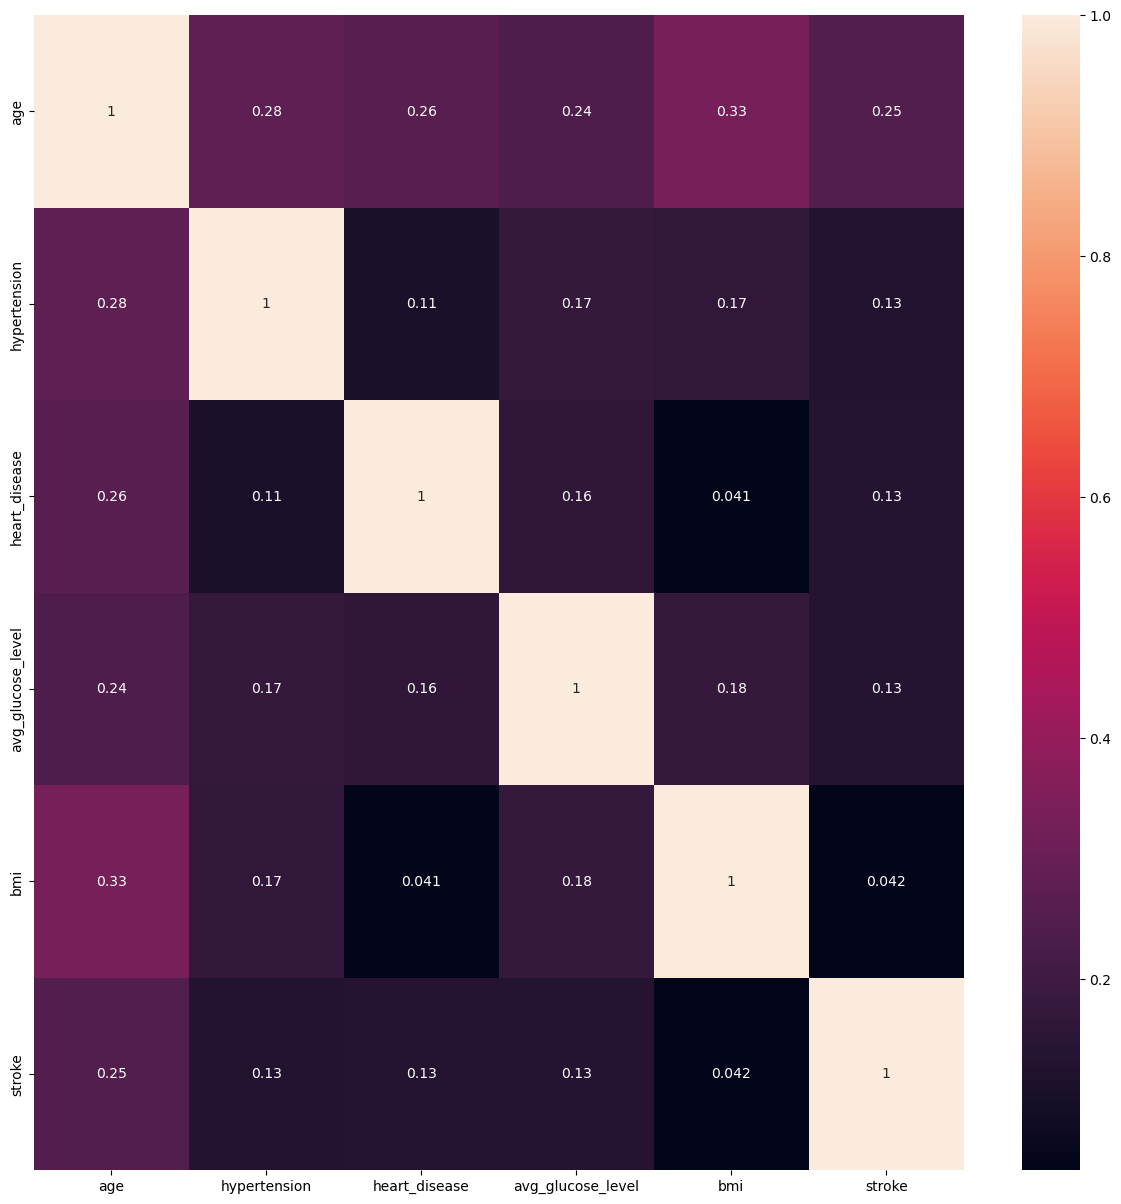

In [23]:
# Menampilkan korelasi antar fitur pada dataset

plt.figure(figsize=(15,15))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)
plt.show()

#### Analisis
Heatmap di atas menunjukkan korelasi antara berbagai variabel terkait kesehatan dan insiden stroke. Korelasi ini diukur dengan nilai antara -1 hingga 1, di mana:

- **1** menunjukkan korelasi positif sempurna (ketika satu variabel meningkat, variabel lain juga meningkat).
- **-1** menunjukkan korelasi negatif sempurna (ketika satu variabel meningkat, variabel lain menurun).
- **0** menunjukkan tidak ada korelasi antara dua variabel.

Berikut adalah analisis per variabel yang dihubungkan dengan stroke dan variabel lainnya:

1. **Age (Usia)**:
   - Korelasi dengan **stroke** adalah **0.25**, menunjukkan bahwa semakin tua usia seseorang, semakin tinggi kemungkinan stroke, meskipun ini adalah korelasi lemah hingga sedang.
   - Usia juga memiliki korelasi cukup tinggi dengan **BMI (0.33)**, yang menunjukkan bahwa BMI cenderung meningkat dengan usia.
   - Korelasi usia dengan **hipertensi (0.28)** dan **penyakit jantung (0.26)** juga cukup signifikan, yang berarti bahwa kedua kondisi ini lebih umum terjadi pada orang tua.

2. **Hypertension (Hipertensi)**:
   - Korelasi dengan **stroke** adalah **0.13**, menunjukkan hubungan yang lemah antara hipertensi dan stroke, tetapi ada kecenderungan bagi mereka yang memiliki hipertensi untuk lebih rentan terkena stroke.
   - Hipertensi memiliki korelasi yang kuat dengan **usia (0.28)**, yang menunjukkan bahwa hipertensi lebih sering terjadi pada usia lanjut.
   - Korelasi dengan **heart disease (0.11)** juga menunjukkan bahwa hipertensi berhubungan dengan penyakit jantung, tetapi korelasinya relatif kecil.

3. **Heart Disease (Penyakit Jantung)**:
   - Korelasi dengan **stroke** adalah **0.13**, menunjukkan hubungan yang lemah antara penyakit jantung dan stroke.
   - Penyakit jantung memiliki korelasi yang signifikan dengan **usia (0.26)**, menunjukkan bahwa penyakit jantung lebih sering terjadi pada orang tua.

4. **Average Glucose Level (Rata-rata Gula Darah)**:
   - Korelasi dengan **stroke** adalah **0.13**, menunjukkan adanya hubungan lemah antara kadar gula darah tinggi dan risiko stroke.
   - Korelasi dengan **usia (0.24)** menunjukkan bahwa kadar gula darah cenderung lebih tinggi pada orang yang lebih tua.
   - Korelasi dengan **BMI (0.18)** menunjukkan bahwa orang dengan BMI yang lebih tinggi cenderung memiliki kadar gula darah yang lebih tinggi.

5. **BMI (Body Mass Index)**:
   - Korelasi dengan **stroke** adalah sangat lemah (**0.042**), menunjukkan bahwa BMI mungkin bukan faktor utama yang berpengaruh langsung pada stroke di dataset ini.
   - BMI memiliki korelasi yang lebih tinggi dengan **usia (0.33)**, menunjukkan bahwa BMI cenderung meningkat seiring bertambahnya usia.
   - BMI juga berkorelasi dengan **hipertensi (0.17)** dan **gula darah (0.18)**, yang menunjukkan bahwa berat badan yang lebih tinggi dapat berhubungan dengan risiko faktor kesehatan lainnya.

#### Kesimpulan
- Faktor **usia** adalah yang paling signifikan terkait dengan stroke, diikuti oleh variabel seperti hipertensi, penyakit jantung, dan kadar gula darah, meskipun korelasinya tidak terlalu kuat.
- **BMI** tampaknya tidak memiliki korelasi yang signifikan dengan stroke, tetapi lebih berkaitan dengan usia dan faktor risiko lain seperti hipertensi dan kadar gula darah.
- Secara keseluruhan, korelasi antara variabel-variabel ini menunjukkan bahwa usia dan faktor kesehatan seperti hipertensi dan kadar gula darah memiliki peran yang lebih besar dalam meningkatkan risiko stroke.

#### Handling Missing Value
Untuk menangani missing value pada fitur **BMI** kami menggunakan fungsi SimpleImputer dari pustaka scikit-learn dengan teknik imputasi rata-rata.

In [24]:
# Menangani Missing Value

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(data[['bmi']])
data['bmi'] = imr.transform(data[['bmi']])
null_counts = data.isnull().sum()

print(f'Jumlah missing value pada dataset:\n{null_counts}')

Jumlah missing value pada dataset:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


#### Delete Other Data in Gender Feature
Pada bagian ini kami menghapus data 'Other' pada fitur gender karena menurut kami tidak relevan dengan data yang seharusnya. Terlebih lagi disini hanya ada satu data, sehingga kami memutuskan untuk menghapusnya. 

In [25]:
# Melihat dan menghitung jumlah nilai unik pada fitur gender

data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [26]:
# Menghapus instansi yang berlabel Other pada fitur gender

data = data[data['gender'] != 'Other']

data['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

#### Encode Data
Pada bagian ini kami melakukan pemetaan data kategorikal menjadi data numerik dengan fungsi LabelEncoder yang disediakan oleh pustaka scikit-learn

In [27]:
# Melakukan encoding pada setiap fitur kategorikal

before_encode = data.copy()

lb = LabelEncoder()
for i in data.select_dtypes(include = 'object').columns:
    data[i] = lb.fit_transform(data[i])

In [28]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [29]:
# Menampilkan data sesudah dan sebelum di encode

print("-- Gender --")
print(before_encode['gender'].unique())
print(data['gender'].unique())
print()

print("-- Ever Married --")
print(before_encode['ever_married'].unique())
print(data['ever_married'].unique())
print()

print('-- Work Type --')
print(before_encode['work_type'].unique())
print(data['work_type'].unique())
print()

print('-- Residence Type --')
print(before_encode['Residence_type'].unique())
print(data['Residence_type'].unique())
print()

print('-- Smoking Status --')
print(before_encode['smoking_status'].unique())
print(data['smoking_status'].unique())

-- Gender --
['Male' 'Female']
[1 0]

-- Ever Married --
['Yes' 'No']
[1 0]

-- Work Type --
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
[2 3 0 4 1]

-- Residence Type --
['Urban' 'Rural']
[1 0]

-- Smoking Status --
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 2 3 0]


### **Modelling**

#### Partitioning Dataset in Training and Test Sets
Pada tahapan ini kami melakukan pembagian dataset menjadi data training dan data testing dengan fungsi train_test_split yang disediakan pustaka scikit-learn. Selain itu, kami juga mengimplementasikan teknik over-sampling, yaitu teknik untuk menyeimbangkan distribusi kelas/fitur dengan menambahkan jumlah instansi atau data yang terlalu sedikit.

In [30]:
# melakukan oversampling pada dataset

smote = SMOTE(random_state=42)

X = data.drop('stroke', axis = 1)
y = data['stroke']

X_copy = X
y_copy = y

X, y = smote.fit_resample(X, y)

# Melakukan scaling pada fitur

scaler = StandardScaler()
for i in X.columns:
    X[i] = pd.DataFrame(scaler.fit_transform(X[[i]]))

for i in X_copy.columns:
    X_copy[i] = pd.DataFrame(scaler.fit_transform(X_copy[[i]]))

# Membagi dataset menjadi data training dan data testing

# With oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

# Without oversampling
X_train_no_oversampling, X_test_no_oversampling, y_train_no_oversampling, y_test_no_oversampling = train_test_split(X_copy, 
                                                                                                                    y_copy, stratify = y_copy, 
                                                                                                                    random_state=42)


#### Search Best Parameter for Random Forest
Pada bagian ini kami menggunakan fungsi GridSearchCV dari pustaka scikit-learn untuk menentukan parameter terbaik untuk tuning model prediksi Random Forest

In [33]:
# Melakukan pencarian parameter terbaik untuk fungsi RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', {0: 1, 1: 10}],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


#### Training Model
Pada bagian ini kami melatih model dengan data training yang sudah disediakan dan memasukkan parameter yang sudah ditentukan sebelumnya pada fungsi.

In [34]:
# Melakukan training model

forest = RandomForestClassifier(n_estimators=50, random_state=0, class_weight="balanced", max_depth=20,
                               min_samples_split=2)

forest_no_oversampling = RandomForestClassifier(n_estimators=50, random_state=0, class_weight="balanced", max_depth=20,
                               min_samples_split=2)

forest_no_oversampling.fit(X_train, y_train)
forest.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=50,
                       random_state=0)

#### Training Result

In [35]:
print(f'Akurasi pada training set tanpa oversampling: {forest_no_oversampling.score(X_train_no_oversampling, y_train_no_oversampling):.3f}')
print(f'Akurasi pada test set tanpa oversampling: {forest_no_oversampling.score(X_test_no_oversampling, y_test_no_oversampling):.3f}')
print('***'*20)
print(f'Akurasi pada training set dengan oversampling: {forest.score(X_train, y_train):.3f}')
print(f'Akurasi pada test set dengan oversampling: {forest.score(X_test, y_test):.3f}')


Akurasi pada training set tanpa oversampling: 0.854
Akurasi pada test set tanpa oversampling: 0.838
************************************************************
Akurasi pada training set dengan oversampling: 1.000
Akurasi pada test set dengan oversampling: 0.942


#### Kesimpulan
Oversampling berhasil meningkatkan performa model pada data test dengan menyeimbangkan data dan membantu menangkap pola dari kelas minoritas.

#### Testing Model
Pada tahapan ini kami melakukan pengetesan pada model prediksi stroke yang sudah dilatih

In [39]:
y_pred = forest.predict(X_test)

y_pred_no_oversampling = forest_no_oversampling.predict(X_test_no_oversampling)

print("Prediksi tanpa oversampling:", y_pred_no_oversampling[:5])
print("Label Sebenarnya tanpa oversampling:", y_test_no_oversampling.values[:5])
print("Prediksi dengan oversampling:", y_pred[:5])
print("Label Sebenarnya dengan oversampling:", y_test.values[:5])
print("***"*20)
print("---"*5 + " Model Tanpa Oversampling " + "---"*5)
print(classification_report(y_test_no_oversampling, y_pred_no_oversampling))
print("***"*20)
print("---"*5 + " Model Dengan Oversampling " + "---"*5)
print(classification_report(y_test, y_pred))



Prediksi tanpa oversampling: [1 0 0 0 0]
Label Sebenarnya tanpa oversampling: [0 0 0 0 0]
Prediksi dengan oversampling: [1 1 0 0 1]
Label Sebenarnya dengan oversampling: [1 1 0 0 1]
************************************************************
--------------- Model Tanpa Oversampling ---------------
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1216
           1       0.15      0.48      0.22        62

    accuracy                           0.84      1278
   macro avg       0.56      0.67      0.57      1278
weighted avg       0.93      0.84      0.88      1278

************************************************************
--------------- Model Dengan Oversampling ---------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1215
           1       0.93      0.96      0.94      1215

    accuracy                           0.94      2430
   macro avg       0.94      0.94   

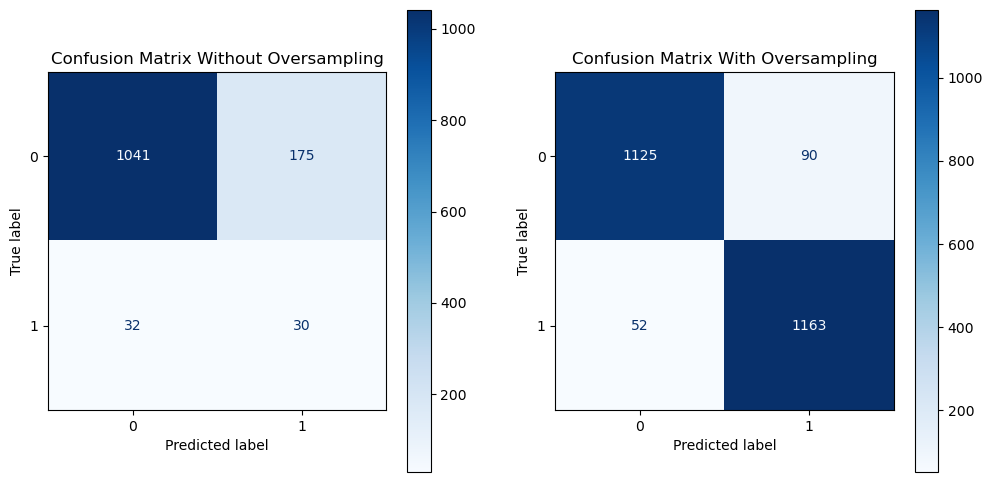

In [37]:
cm1 = confusion_matrix(y_test_no_oversampling, y_pred_no_oversampling)
cm2 = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0, 1])
disp1.plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title("Confusion Matrix Without Oversampling")

# Confusion matrix kedua
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
disp2.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("Confusion Matrix With Oversampling")

# Menampilkan subplot
plt.show()


### Conclusion

Your conclusion are here (replace the following examples) 
<ul>
    <li>Oversampling dengan SMOTE secara signifikan meningkatkan performa model pada kelas minoritas, menjadikannya solusi yang efektif untuk menangani ketidakseimbangan data.</li>
    <li>Model dengan oversampling menunjukkan performa baik dengan akurasi tinggi pada test set (94.2%) dan evaluasi metrik yang lebih seimbang dibandingkan dengan model tanpa oversampling.</li>
</ul>

In [1]:
!jupyter nbconvert --to html "./UAS2024_IF540L_KelasHL_Kelompok_2.ipynb" --output-dir="./HTML Files/"

[NbConvertApp] Converting notebook ./UAS2024_IF540L_KelasHL_Kelompok_2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 672759 bytes to HTML Files\UAS2024_IF540L_KelasHL_Kelompok_2.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#